In [41]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import pandas as pd


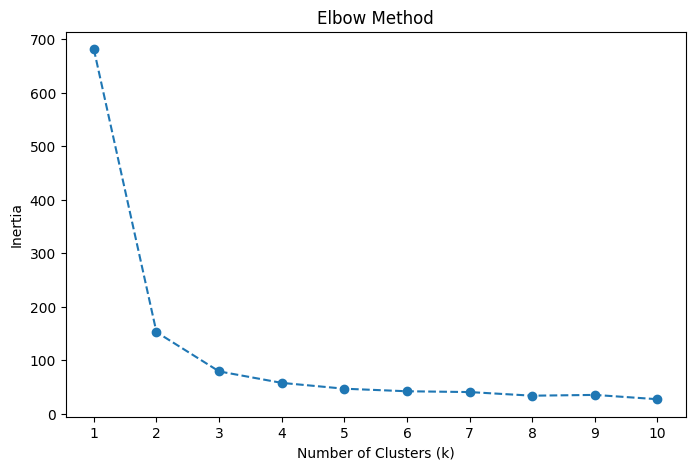

In [42]:

iris = load_iris()
X = iris.data
y = iris.target  


inertias = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)


iris = load_iris(as_frame=True)
X_copy = iris.data
X_copy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Accuracy: 0.89
(ARI): 0.73


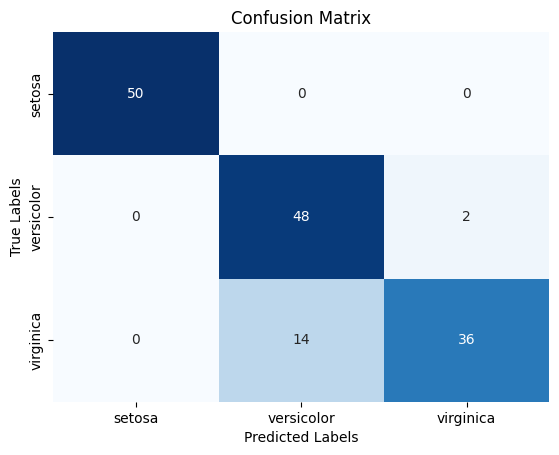

In [44]:

# Map cluster labels to match true labels
labels = np.zeros_like(y_pred)
for i in range(3):  
    mask = (y_pred == i)
    labels[mask] = mode(y[mask])[0]

accuracy = accuracy_score(y, labels)
ari = adjusted_rand_score(y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"(ARI): {ari:.2f}")

conf_matrix = confusion_matrix(y, labels)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


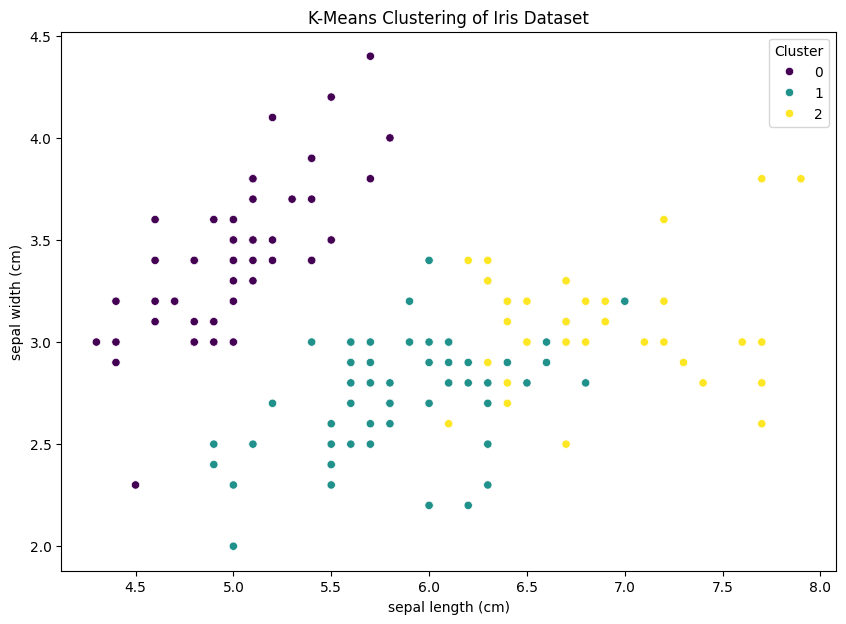

In [45]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = y_pred

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', palette='viridis', data=df, legend='full')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()